# Regression

This code contains the Random Forest Regressor and the Gradient Boosting Regressor.

## Imports, data, and functions

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

### Dataset

The code from the plots illustrating the feature importance is taken from "https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression".

In [8]:
#Reading the datset
def read_csv_and_extract_data(csv_file):
    df = pd.read_csv(csv_file)
    y = df['streamflow'].values
    X_columns = ['days', 'precip', 'temp_min', 'temp_max', 'humidity_spec', 'radiation_sw']
    X = df[X_columns].values
    feature_names = X_columns
    return X, y, feature_names

#Splitting into test and train
X, y, feature_names = read_csv_and_extract_data('Project3_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Functions

In [9]:
# Plotting the results
def plot_true_vs_predicted(y_true, y_pred, set_name, label):
    if str(label) == 'Train':
        plt.scatter(y_true, y_pred, alpha=0.5, label=f'{label} set')
    else:
        plt.scatter(y_true, y_pred, alpha=0.5, label=f'{label} set', marker = '^')
    plt.title('True vs Predicted Values ' + f'{set_name}', fontsize = 12)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    line = np.linspace(min(min(y_true), min(y_pred)), max(max(y_true), max(y_pred)), 100)
    if str(label) == 'Train':
        plt.plot(line, line, color='grey', linestyle='--')
    plt.legend()

## Random Forest Regressor

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.092) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.058) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.079) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.173) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.061) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test

[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.055) total time=   0.1s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.060) total time=   0.1s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.132) total time=   0.1s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.043) total time=   0.1s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.072) total time=   0.3s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.047) total time=   0.3s
[CV 3/5] END max_depth=20, m

[CV 4/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.132) total time=   0.1s
[CV 5/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_mean_squared_error: (test=-0.043) total time=   0.1s
[CV 1/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.072) total time=   0.3s
[CV 2/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.047) total time=   0.3s
[CV 3/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.063) total time=   0.3s
[CV 4/5] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; neg_mean_squared_error: (test=-0.130) total time=   0.3s
[CV 5/5] END max_depth=30, m

C:\Users\IFE12739\AppData\Local\Temp\ipykernel_17112\3635067859.py:43: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_neg_mean_squared_error')
C:\Users\IFE12739\AppData\Local\Temp\ipykernel_17112\3635067859.py:43: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_neg_mean_squared_error')


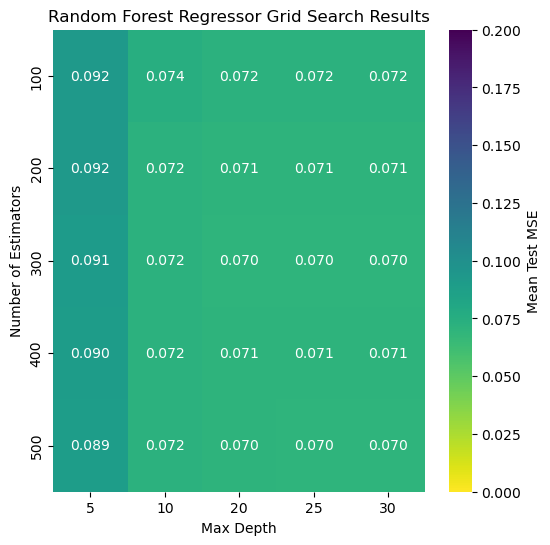

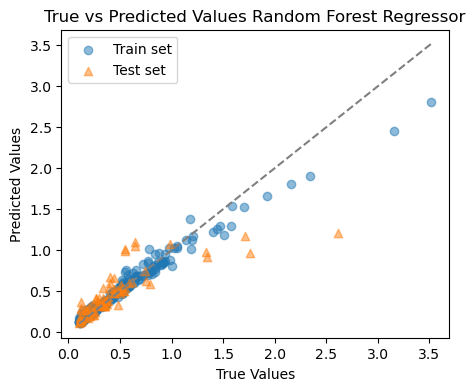

In [10]:
def RFR(n_estimators, max_depth):
    model = RandomForestRegressor(random_state=1)
    '''
    Random forest regressor. Consists of a number of classifying decision trees. 
    Default parameters: n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
    oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None.
    '''
    n_features = 6
    
    # Grid-search
    search_space = {
        "n_estimators": n_estimators, # Number of trees in the forest
        "max_depth": max_depth, # Max depth of the tree
        "min_samples_split": [2], # Min number of samples required to split an internal node
        "min_samples_leaf": [1], # Min number of samples required to be at a leaf node
        "max_features": ['log2'] # Number of features to consider when looking for the best split. Regresion: log2(n_features)
    }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["neg_mean_squared_error"],
                      refit="neg_mean_squared_error", cv=5, verbose=4)
        GS.fit(X_train, y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["neg_root_mean_squared_error"], refit="neg_root_mean_squared_error", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    print('Best estimators: ', GS.best_estimator_)
    print('Best parameters: ', GS.best_params_)
    print('Train MSE: {:.3f}'.format(-GS.best_score_))
    mse_test = mean_squared_error(y_test, y_pred_test)
    print('Test MSE: {:.3f}'.format(mse_test))
    
    # Make a heatmap
    results = pd.DataFrame(GS.cv_results_)
    heatmap_data = results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_neg_mean_squared_error')
    heatmap_data = heatmap_data.abs()
    plt.figure(figsize=(6, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', fmt='.3f', cbar_kws={'label': 'Mean Test MSE'},  vmin=0.0, vmax=0.2)
    plt.title('Random Forest Regressor Grid Search Results')
    plt.xlabel('Max Depth')
    plt.ylabel('Number of Estimators')
    plt.savefig('grid_search_heatmap_rfr.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "Random Forest Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "Random Forest Regressor", label="Test")
    plt.savefig('RFR.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
RFR([100,200,300,400,500], [5,10,20,25,30])

## Gradient Boosting Regressor

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, subsample=0.8; neg_mean_squared_error: (test=-0.115) total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, subsample=0.8; neg_mean_squared_error: (test=-0.207) total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, subsample=0.8; neg_mean_squared_error: (test=-0.056) total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, subsample=0.8; neg_mean_squared_error: (test=-0.145) total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, subsample=0.8; neg_mean_square

[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400, subsample=0.8; neg_mean_squared_error: (test=-0.043) total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400, subsample=0.8; neg_mean_squared_error: (test=-0.088) total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=400, subsample=0.8; neg_mean_squared_error: (test=-0.029) total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500, subsample=0.8; neg_mean_squared_error: (test=-0.078) total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500, subsample=0.8; neg_mean_squared_error: (test=-0.112) total time=   0.1s
[CV 3/5] END learnin

[CV 5/5] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200, subsample=0.8; neg_mean_squared_error: (test=-0.038) total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300, subsample=0.8; neg_mean_squared_error: (test=-0.059) total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300, subsample=0.8; neg_mean_squared_error: (test=-0.132) total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300, subsample=0.8; neg_mean_squared_error: (test=-0.059) total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300, subsample=0.8; neg_mean_squared_error: (test=-0.075) total time=   0.0s
[CV 5/5] END learning_rat

C:\Users\IFE12739\AppData\Local\Temp\ipykernel_15204\2711095260.py:45: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')
C:\Users\IFE12739\AppData\Local\Temp\ipykernel_15204\2711095260.py:45: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')


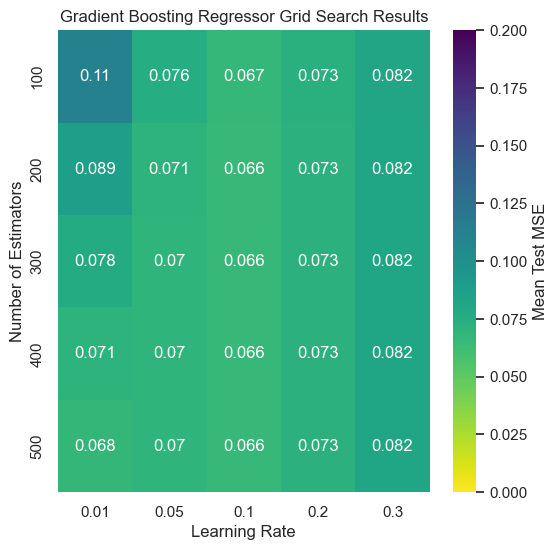

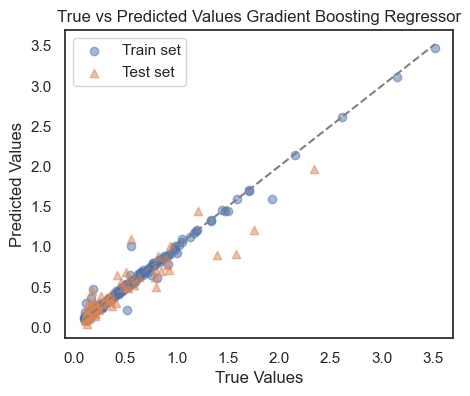

In [19]:
def GBR(n_estimators, learning_rate):
    model = GradientBoostingRegressor(random_state=1, validation_fraction=0.1, n_iter_no_change=50)
    '''
    Gradient boosting regressor. Additive model where a regression tre is fit on the negative graident of a loss function.
    Default parameters: loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, 
    random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0.
    '''
    
    # Grid-search
    search_space = {
        "n_estimators": n_estimators, # The number of boosting stages to perform
        "learning_rate": learning_rate, # Shrinking the contribution of each tree
        "max_depth": [5], # Max depth of the tree
        "min_samples_split": [6], # Min number of samples required to split an internal node
        "min_samples_leaf": [4], # Min number of samples required to be at a leaf node
        "subsample": [0.8], # Stochastic gradient boosting if smaller than 1
        "max_features": ['log2'] # Number of features to consider when looking for the best split. Regresion: log2(n_features)
    }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["neg_mean_squared_error"],
                      refit="neg_mean_squared_error", cv=5, verbose=4)
        GS.fit(X_train, y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["neg_root_mean_squared_error"], refit="neg_root_mean_squared_error", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    print('Best estimators: ', GS.best_estimator_)
    print('Best parameters: ', GS.best_params_)
    print('Train MSE: {:.3f}'.format(-GS.best_score_))
    mse_test = mean_squared_error(y_test, y_pred_test)
    print('Test MSE: {:.3f}'.format(mse_test))

    # Make a heatmap
    results = pd.DataFrame(GS.cv_results_)
    heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')
    heatmap_data = heatmap_data.abs()
    plt.figure(figsize=(6, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', fmt='.2', cbar_kws={'label': 'Mean Test MSE'},  vmin=0.0, vmax=0.2)
    plt.title('Gradient Boosting Regressor Grid Search Results')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Estimators')
    plt.savefig('grid_search_heatmap_gbr.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "Gradient Boosting Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "Gradient Boosting Regressor", label="Test")
    plt.savefig('GBR.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
GBR([100,200,300,400,500], [0.01, 0.05, 0.1, 0.2, 0.3])

### XGBoost

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.105) total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.180) total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.065) total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.124) total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.054) total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=600, reg_alpha=0.1, reg_lambda=0.1, subsampl

[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.055) total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.054) total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.150) total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.068) total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.084) total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.057) total time=   0.1s
[CV

[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.045) total time=   0.3s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.051) total time=   0.1s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.154) total time=   0.1s
[CV 3/5] END learning_rate=0.3, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.079) total time=   0.1s
[CV 4/5] END learning_rate=0.3, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.082) total time=   0.1s
[CV 5/5] END learning_rate=0.3, max_depth=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; neg_mean_squared_error: (test=-0.044) total time=   0.1s
[CV 

C:\Users\IFE12739\AppData\Local\Temp\ipykernel_15204\3946716330.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')
C:\Users\IFE12739\AppData\Local\Temp\ipykernel_15204\3946716330.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')


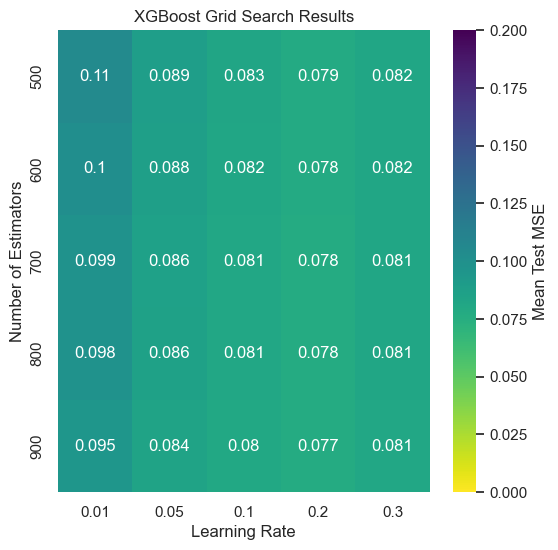

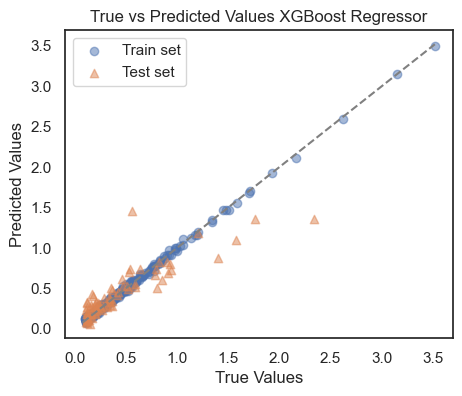

In [22]:
def XGB(n_estimators, learning_rate):
    model =  xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, tree_method="hist",
    eval_metric=mean_absolute_error, random_state = 1)
    '''
    XGBoost regressor. A GBR model.
    Default parameters: base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None,
    colsample_bytree=0.3, device=None, early_stopping_rounds=None, enable_categorical=False,
    eval_metric= mean_absolute_error, feature_types=None, gamma=None, grow_policy=None, importance_type=None, 
    interaction_constraints=None, learning_rate=0.1, max_bin=None, max_cat_threshold=None,
    max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan,
    monotone_constraints=None, multi_strategy=None, n_estimators=100, n_jobs=None, num_parallel_tree=None.
    '''
    
    # Grid-search
    search_space = {
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'max_depth': [3],
        'subsample': [0.8],
        'reg_alpha': [0.1],
        'reg_lambda': [0.1],
        }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["neg_mean_squared_error"],
                      refit="neg_mean_squared_error", cv=5, verbose=4)
        GS.fit(X_train, y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["neg_root_mean_squared_error"], refit="neg_root_mean_squared_error", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Print performance
    print('Best estimators: ', GS.best_estimator_)
    print('Best parameters: ', GS.best_params_)
    print('Train MSE: {:.3f}'.format(-GS.best_score_))
    mse_test = mean_squared_error(y_test, y_pred_test)
    print('Test MSE: {:.3f}'.format(mse_test))

    # Make a heatmap
    results = pd.DataFrame(GS.cv_results_)
    heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_neg_mean_squared_error')
    heatmap_data = heatmap_data.abs()
    plt.figure(figsize=(6, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', fmt='.2', cbar_kws={'label': 'Mean Test MSE'},  vmin=0.0, vmax=0.2)
    plt.title('XGBoost Grid Search Results')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Estimators')
    plt.savefig('grid_search_heatmap_xgb.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "XGBoost Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "XGBoost Regressor", label="Test")
    plt.savefig('XGBoost.pdf', format='pdf', bbox_inches="tight")
    plt.show()

XGB([500,600,700,800,900], [0.01, 0.05, 0.1, 0.2, 0.3])